<h1><p style="text-align:center">***THE SPARKS FOUNDATION***</p></h1>

<h2><p style="text-align:center">Data Sciecne & Business Analytics Internship (#GRIPMARCH21)</p></h2>

## Created By : Ruchika Gajeshwar

## Problem Statement :-

<h1><p style="text-align:center">Task 3 - To Explore Decision Tree Algorithm:</p></h1>


### - **In this task, we will create a Decision Tree classifier for the Iris Dataset and visualize it graphically. We will also evaluate our classifier's performance.**

<h1><p style="text-align:center"> Solution</p></h1>

## Step 1 :  Importing Required Libraries -

In [100]:
# Python Libraries:
import pandas as pd
import numpy as np


# Libraries for Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Library required for splitting data in Train and Test:
from sklearn.model_selection import train_test_split

# Library required for Decision Tree:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Step 2 : Reading the Data -

In [57]:
df = pd.read_csv("Iris.csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
# Checking first 5 rows:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# Checking Last 5 rows:

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
# Fetching 5 records at random from the dataset:

df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,28,5.2,3.5,1.5,0.2,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
97,98,6.2,2.9,4.3,1.3,Iris-versicolor


In [75]:
# Five Number Summary:

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Step 3: Understanding the Data - 

- ### **Datatype Of Columns**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- We can conclude that the datatypes are correctly used as per the requirement of the data.

- ### **Shape Of Data**

In [81]:
print("The number of rows in data :-", df.shape[0])

The number of rows in data :- 150


In [82]:
print("The number of columns in data :-", df.shape[1])

The number of columns in data :- 6


* ### **Null Values**

In [62]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- There are no null values in the dataset.

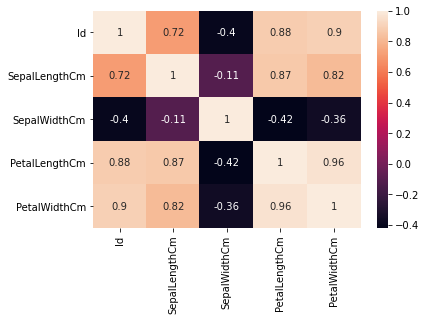

In [85]:
sns.heatmap(df.corr(),annot = True);

In [63]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [64]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [35]:
df['Species'] = df['Species'].map(species)

In [37]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [39]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

In [40]:
X.shape, y.shape

((150, 4), (150,))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


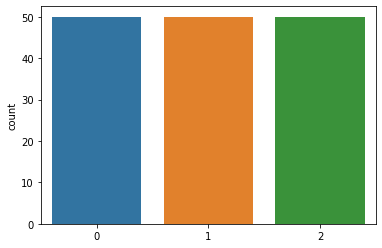

In [41]:
sns.countplot(y)
plt.show()

- OBSERVATION: We can notice that the data is completely balanced Dataset.

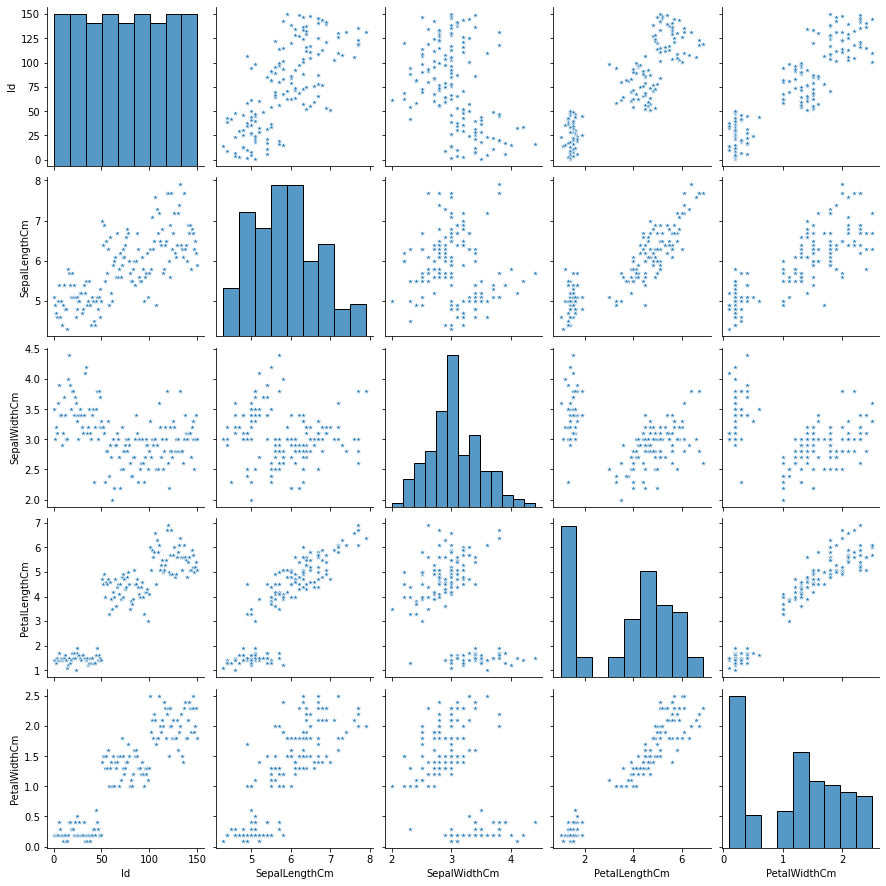

In [14]:
sns.pairplot(df, markers = '*')

## Step 4 : Decision Tree Classification using scikit-learn - 

In [87]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [88]:
y = df[['Species']]

### - **Spliting the Dataset into Train and Test Split -**

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
# print dimension of train set:
print('X_train', X_train.shape)
print('y_train', y_train.shape) 


# print dimension of test set:
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (120, 4)
y_train (120, 1)
X_test (30, 4)
y_test (30, 1)


### - **Building a Decision Tree Classifier**

In [94]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [95]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

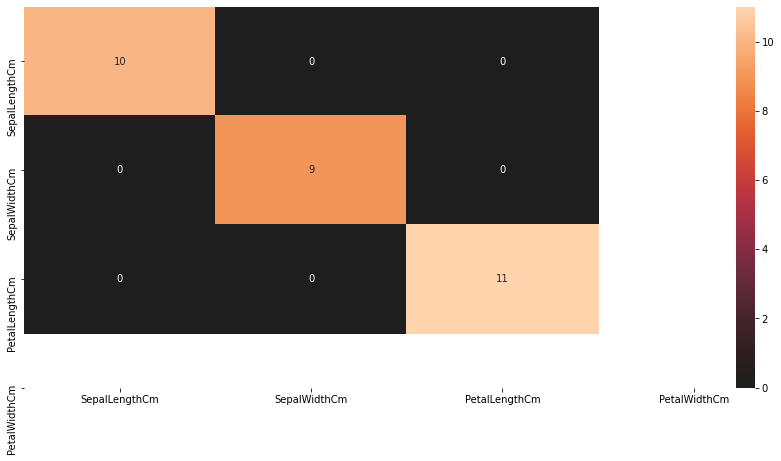

In [97]:
plt.figure(figsize = (15,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = df.iloc[:, 1:5].columns.values,  yticklabels = df.iloc[:, 1:5].columns.values, center = 0, annot = True)
plt.show()

In [98]:
# Checking value for Precision, Recall and F1 Score.

print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


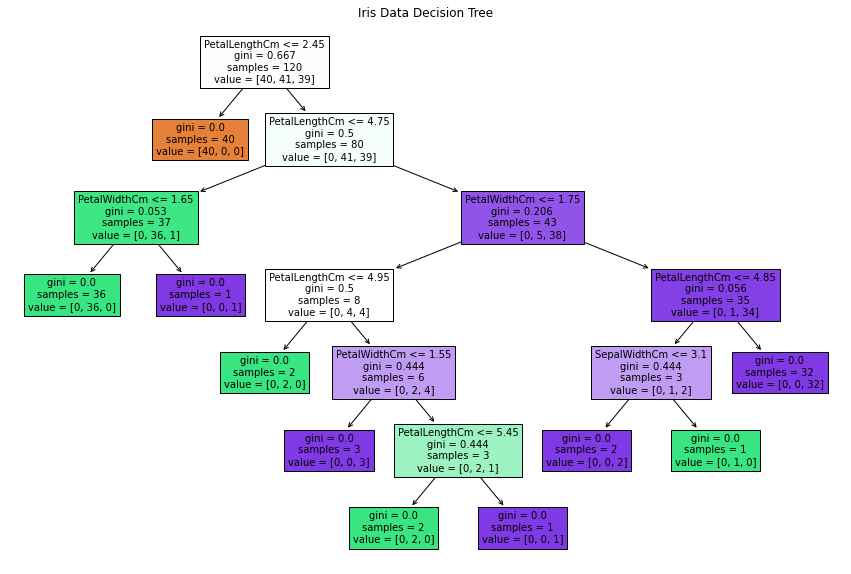

In [99]:
# Plotting Decision Tree:

plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

<h1><p style="text-align:center">Thank You!! </p></h1>